In [60]:
from utils import  multGF28, rand_matrix, time_me
import numpy as np
from matplotlib import pyplot as plt 


## Hipotesis:

Como equipo planteamos la siguiente hipótesis:

<p>"La opción que se elija afectará considerablemente el rendimiento del algoritmo al momento en que se comience a trabajar con matrices que requieran el uso de memoria secundaria"</p>
<p>Esto debido a la localidad de los accesos, es decir dependiendo de como guarde el disco una matriz la cantidad de accesos a memoria secundaria serán considerablemente mayores. Si el disco guarda las matrices en el disco dejando las filas juntas (idealmente en un bloque), <em>transposed-matrix-mul</em> tendrá un mejor rendimiento ya que tendrá que hacer menos accesos a memoria secundaria en la linea:</p>

```
for k from 1 to n:
    result = result + (A[i][k] * Bt[j][k])
    C[i][j] = result
```
<p>Por otro lado, si guarda las columnas juntas, <em>matrix-mul</em> debería tener un mejor rendimiento al realizar menos accesos a memoria. Esto se daría en la linea de codigo: </p>

```
for k from 1 to n:
    result = result + (A[i][k] * B[k][j])
    C[i][j] = result
```
<p>Esto ya que los elementos <code>B[k][j]</code> deberían estar en el mismo bloque</p>

In [2]:
def matrix_mul(A, B):
    n = len(A)
    C = np.zeros((n,n), dtype = int)
    for i in range(n):
        for j in range(n):
            result = 0
            for k in range(n):
                result += multGF28(A[i,k],B[k,j])
            C[i,j] = result
    return C

In [3]:
def transposed_matrix_mul(A, B):
    n = len(A)
    C = np.zeros((n,n), dtype = int)
    Bt = np.transpose(B)
    for i in range(n):
        for j in range(n):
            result = 0
            for k in range(n):
                result += multGF28(A[i,k],Bt[j,k])
            C[i,j] = result
    return C

In [ ]:
# Generemos los valores para el experimento
n = [2**i for i in range(3,12)]
n_repeat = 2
times_m_m = np.zeros(len(n))
times_t_m_m = np.zeros(len(n))
k = 0
for i in n:
    print(i)
    for j in range(n_repeat):
        A = rand_matrix(i)
        B = rand_matrix(i)
        times_m_m[k] += time_me(matrix_mul, A, B)/n_repeat
        times_t_m_m[k] += time_me(transposed_matrix_mul, A, B)/n_repeat
    k += 1

8
16
32
64
128
256
512


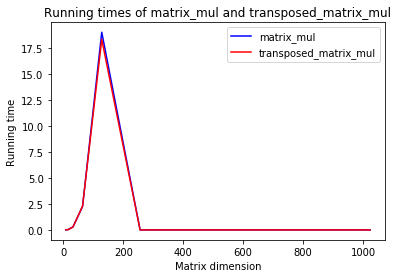

In [70]:
plt.title("Running times of matrix_mul and transposed_matrix_mul")
plt.xlabel("Matrix dimension")
plt.ylabel("Running time")
plt.plot(n,times_m_m,"-b",label="matrix_mul")
plt.plot(n,times_t_m_m,"-r",label="transposed_matrix_mul")
plt.legend()
plt.show()